<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MERRA-2" data-toc-modified-id="MERRA-2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MERRA-2</a></span></li><li><span><a href="#Getting-data-(introduction)" data-toc-modified-id="Getting-data-(introduction)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Getting data (introduction)</a></span></li><li><span><a href="#Working-with-files" data-toc-modified-id="Working-with-files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Working with files</a></span></li><li><span><a href="#PM2.5" data-toc-modified-id="PM2.5-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>PM<sub>2.5</sub></a></span></li><li><span><a href="#SLV" data-toc-modified-id="SLV-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>SLV</a></span></li><li><span><a href="#FLX" data-toc-modified-id="FLX-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>FLX</a></span></li><li><span><a href="#AER" data-toc-modified-id="AER-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>AER</a></span></li><li><span><a href="#Concluding-notes" data-toc-modified-id="Concluding-notes-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Concluding notes</a></span></li></ul></div>

# Ideas

- in the previous excercise (2.2), we started with a raw data from a ground station, then went cleaning data, and analyzed correlation between inputs like wind speed, temperature with PM<sub>2.5</sub> concentration.
- data ground station is an important resource, but it is limited in quantity, and depends on the location, will be hard to find
- data generated in the model presents a large-scale data, available to almost (all) location in the world, but the resolution is coarse. Extract data from the digital product also requires more hardware and software than a single CSV file in the previous excercise
- in this exercise, we are going to investigate the data from MERRA-2 and how to use the data to understand the correlation with PM<sub>2.5</sub> concentration

## MERRA-2
or The Modern-Era Retrospective for Research and Applications, Version 2 published by [NASA](https://gmao.gsfc.nasa.gov/reanalysis/MERRA-2/)

- it is a massive digital product under reanalysis category, the most accurate and well-curated product in the world of numerical dataset
- data is generated in a scalar format, with latitude, longtitude, timestamp and with interested parameters such as skin temperature, windpseed at 2m above the grond, and many others

## Getting data (introduction)

- depend on the resources you have, my guess is (since you found this post) don't have the access and resources like those in big insitutes with a direct share with NASA
- if so, getting the whole set of data in regular basis is not an option
- this is true for me, I was lucky to found out that the MERRA-2 can be acquired by sub-set approach, that is only get data from the area of interest, a single point of interest actually
    - For example, you can manually down interest data wia [OpeNDAP Access](https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2)
    - and here is a longer version about [OPeNDAP](https://earthdata.nasa.gov/collaborate/open-data-services-and-software/api/opendap/opendap-user-guide)

- however, before you are able to download file in .nc4 (or [NetCDF-4](https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2/M2T1NXFLX.5.12.4/2020/05/MERRA2_400.tavg1_2d_flx_Nx.20200530.nc4.html) format 

    - [register user](https://urs.earthdata.nasa.gov/users/new)
    - Under Applications/Authorized Apps, then Approve more application, select NASA GESDISC DATA ARCHIVE 
    - and basically, go through this notebook to understand how to get the data https://github.com/Open-Power-System-Data/weather_data/blob/ace842004fd2cc018673085f77e4d91bb30da3d9/download_merra2.ipynb
- to work with specific tags, check out this document:
    https://gmao.gsfc.nasa.gov/pubs/docs/Bosilovich785.pdf

- In this exercise, we will data with three groups (tags):
1. SLV = single level 
2. FLX = surface turbulent fluxes and related quantities 
3. AER = aerosol mixing ratio

- There are more than 20 groups in MERRA-2 

**What did I get the data?**
1. Customzied a url link the server for a single location (Hanoi in this case). The link addresses Hyrax server that support sub-setting, so I can freely choose the group and parameters in the group to download. 
2. Download the files. Each file contains data for the location for each day. Depends on the group (tag), each file is about 300kB in .nc4 file
3. Read the raw .nc4 file using xarray and pandas and concatinate the data of each day into a dataframe. The data then is saved to a CSV file

## Working with files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('default')
plt.rcParams['font.family'] = 'monospace'

In [3]:
# in addition we need netCDF package to read raw .nc4 file
# try to install this package by 
try:
    import netCDF4 as nc
except Exception:
    !pip install netCDF4 --user

## PM<sub>2.5</sub>

In [4]:
# first let load PM2.5 data into a dataframe
pm25 = pd.read_csv('data/cleaned_pm25_Hanoi_PM2.5_2018_YTD.csv', 
                   parse_dates=['Date (LT)'], 
                   index_col=['Date (LT)'])

In [5]:
pm25.head()

pm25
Date (LT)                
2018-01-01 01:00:00  69.2
2018-01-01 02:00:00  75.5
2018-01-01 03:00:00  90.2
2018-01-01 04:00:00  97.6
2018-01-01 05:00:00  89.1

## SLV
Single Level Diagnosis

In [6]:
# load the preprocessed file, noted that the raw format from MERRA-2 is in .nc4
df = pd.read_csv('data/merra2_slv_hanoi_2018.csv',
                parse_dates=['time'],
                index_col=['time'])
df.head(3)

U2M       V250      TROPT      TROPPB        T2M  \
time                                                                         
2018-01-01 00:00:00  0.023183  10.807207  192.34645  10051.0290  287.10890   
2018-01-01 01:00:00  0.189619  11.351880  192.50723  10052.2750  286.79376   
2018-01-01 02:00:00  0.243190  11.913273  192.63431  10051.5625  286.48932   

                          TQL       T500      U850         PS      V850  ...  \
time                                                                     ...   
2018-01-01 00:00:00  0.008423  267.34950 -0.678858  100905.08  6.310610  ...   
2018-01-01 01:00:00  0.009235  267.07660 -0.398818  100865.09  6.162886  ...   
2018-01-01 02:00:00  0.006260  266.77542 -0.217877  100819.56  5.993750  ...   

                          H850       T850      U50M      U10M    TROPPV  \
time                                                                      
2018-01-01 00:00:00  1527.0985  283.53122  0.030755  0.031674  7564.037   
2018-01-01 01:00:00  1522.4517  283.64413  0.424628  0.304242  7369.791   
2018-01-01 02:00:00  1518.0483  283.75928  0.544786  0.386887  7256.081   

                          H500      V500     T2MWET       U500     QV10M  
time                                                                      
2018-01-01 00:00:00  5840.2160 -1.304574  284.03730  11.181688  0.007823  
2018-01-01 01:00:00  5835.2650 -2.038413  283.94345  11.029030  0.007823  
2018-01-01 02:00:00  5830.6333 -2.332026  283.87656  10.573646  0.007822  

[3 rows x 39 columns]

In [7]:
df.index.rename('DATE', inplace=True)

In [8]:
df.columns

Index(['U2M', 'V250', 'TROPT', 'TROPPB', 'T2M', 'TQL', 'T500', 'U850', 'PS',
       'V850', 'H250', 'Q250', 'T2MDEW', 'V50M', 'Q500', 'DISPH', 'H1000',
       'TS', 'T10M', 'TROPPT', 'SLP', 'U250', 'Q850', 'ZLCL', 'TQV', 'V2M',
       'T250', 'TROPQ', 'V10M', 'H850', 'T850', 'U50M', 'U10M', 'TROPPV',
       'H500', 'V500', 'T2MWET', 'U500', 'QV10M'],
      dtype='object')

In [9]:
# merge data with PM2.5 based on timestamp
df = pd.merge(df, pm25, right_index=True, left_index=True)

In [10]:
# correlation
df.corr()

U2M      V250     TROPT    TROPPB       T2M       TQL      T500  \
U2M     1.000000 -0.168647  0.127118  0.103545  0.204930 -0.214273  0.217229   
V250   -0.168647  1.000000 -0.105805 -0.143095 -0.173800  0.055265 -0.346683   
TROPT   0.127118 -0.105805  1.000000  0.710519  0.315999  0.113366  0.084146   
TROPPB  0.103545 -0.143095  0.710519  1.000000  0.241940  0.192804  0.208752   
T2M     0.204930 -0.173800  0.315999  0.241940  1.000000  0.167113  0.379661   
TQL    -0.214273  0.055265  0.113366  0.192804  0.167113  1.000000  0.176738   
T500    0.217229 -0.346683  0.084146  0.208752  0.379661  0.176738  1.000000   
U850    0.271165  0.099452 -0.048513 -0.155499  0.187251 -0.212809 -0.034795   
PS     -0.335614  0.163366 -0.268950 -0.221896 -0.800861 -0.220019 -0.536012   
V850   -0.312188  0.220298 -0.044988 -0.076772  0.043098  0.090908 -0.166849   
H250    0.307683 -0.330496  0.205358  0.362908  0.532656  0.206638  0.760916   
Q250    0.284000 -0.187080  0.311729  0.293736  0.562340  0.366423  0.598024   
T2MDEW  0.252522 -0.121195  0.330871  0.297066  0.881810  0.234983  0.399133   
V50M   -0.052309  0.143110  0.039430 -0.083421  0.284063 -0.195008 -0.085953   
Q500    0.251268 -0.180645  0.296136  0.278538  0.487455  0.414046  0.428289   
DISPH   0.309657 -0.326269  0.352388  0.447360  0.456001  0.204244  0.534780   
H1000  -0.339236  0.168014 -0.266953 -0.220505 -0.791838 -0.223211 -0.544481   
TS      0.152840 -0.150674  0.290673  0.216660  0.979687  0.172689  0.329715   
T10M    0.237887 -0.186387  0.322596  0.248458  0.995631  0.148431  0.397767   
TROPPT  0.098688 -0.138952  0.621385  0.959286  0.218696  0.177579  0.206119   
SLP    -0.335630  0.161301 -0.270024 -0.222850 -0.803458 -0.219853 -0.532607   
U250   -0.349872  0.334070 -0.270363 -0.330989 -0.590143 -0.195609 -0.754873   
Q850    0.159805 -0.083300  0.264918  0.283338  0.752515  0.403688  0.409837   
ZLCL    0.061855 -0.219796  0.019520 -0.068382  0.284674 -0.215289  0.095869   
TQV     0.216785 -0.185137  0.338259  0.328528  0.700037  0.483621  0.477523   
V2M    -0.043367  0.130550  0.027889 -0.097585  0.311341 -0.176413 -0.106078   
T250    0.352099 -0.289509  0.225112  0.292160  0.568895  0.291312  0.540392   
TROPQ   0.156627 -0.219427  0.768931  0.566553  0.403356  0.205404  0.298724   
V10M   -0.041583  0.132761  0.034189 -0.091241  0.307853 -0.185323 -0.095578   
H850   -0.286488  0.158475 -0.193460 -0.171207 -0.610742 -0.267564 -0.567753   
T850    0.335203 -0.060771  0.274756  0.213358  0.787170  0.134607  0.332949   
U50M    0.920096 -0.165804  0.115386  0.090211  0.282559 -0.174081  0.200402   
U10M    0.988198 -0.169402  0.121791  0.097291  0.229919 -0.202633  0.212091   
TROPPV  0.167138 -0.176518  0.560634  0.537686  0.429204  0.209282  0.288657   
H500    0.063282 -0.079082  0.072506  0.161373  0.172058 -0.083714  0.197303   
V500   -0.244479  0.532668  0.002238 -0.034919 -0.029962  0.134465 -0.280775   
T2MWET  0.252473 -0.121347  0.330952  0.297063  0.881913  0.234983  0.399307   
U500   -0.307177  0.244796 -0.339504 -0.380916 -0.564566 -0.202340 -0.576094   
QV10M   0.248954 -0.156424  0.343560  0.300166  0.840431  0.273304  0.473378   
pm25   -0.028249  0.123757 -0.263994 -0.239577 -0.332513 -0.290687 -0.216435   

            U850        PS      V850  ...      T850      U50M      U10M  \
U2M     0.271165 -0.335614 -0.312188  ...  0.335203  0.920096  0.988198   
V250    0.099452  0.163366  0.220298  ... -0.060771 -0.165804 -0.169402   
TROPT  -0.048513 -0.268950 -0.044988  ...  0.274756  0.115386  0.121791   
TROPPB -0.155499 -0.221896 -0.076772  ...  0.213358  0.090211  0.097291   
T2M     0.187251 -0.800861  0.043098  ...  0.787170  0.282559  0.229919   
TQL    -0.212809 -0.220019  0.090908  ...  0.134607 -0.174081 -0.202633   
T500   -0.034795 -0.536012 -0.166849  ...  0.332949  0.200402  0.212091   
U850    1.000000 -0.270052  0.322359  ...  0.346789  0.268449  0.269970   
PS     -0.270052  1.000000 -0.013857  ... -0.862692 -0.34

In [11]:
# not very useful, let select correlation with PM2.5 only
df.corr()['pm25']

U2M      -0.028249
V250      0.123757
TROPT    -0.263994
TROPPB   -0.239577
T2M      -0.332513
TQL      -0.290687
T500     -0.216435
U850      0.028578
PS        0.357018
V850     -0.009497
H250     -0.308451
Q250     -0.363976
T2MDEW   -0.377794
V50M     -0.004372
Q500     -0.333410
DISPH    -0.298620
H1000     0.359755
TS       -0.299172
T10M     -0.333160
TROPPT   -0.217568
SLP       0.358491
U250      0.315245
Q850     -0.408753
ZLCL      0.055482
TQV      -0.468133
V2M       0.036243
T250     -0.321817
TROPQ    -0.308604
V10M      0.019581
H850      0.314116
T850     -0.369821
U50M     -0.024330
U10M     -0.028514
TROPPV   -0.296435
H500     -0.080740
V500      0.006930
T2MWET   -0.377879
U500      0.292795
QV10M    -0.418552
pm25      1.000000
Name: pm25, dtype: float64

In [12]:
# still quit many paramters, and if you link me, these abbreviation is quite foreign,
# let first try to sort out the value first
df.corr()['pm25'].sort_values()

TQV      -0.468133
QV10M    -0.418552
Q850     -0.408753
T2MWET   -0.377879
T2MDEW   -0.377794
T850     -0.369821
Q250     -0.363976
Q500     -0.333410
T10M     -0.333160
T2M      -0.332513
T250     -0.321817
TROPQ    -0.308604
H250     -0.308451
TS       -0.299172
DISPH    -0.298620
TROPPV   -0.296435
TQL      -0.290687
TROPT    -0.263994
TROPPB   -0.239577
TROPPT   -0.217568
T500     -0.216435
H500     -0.080740
U10M     -0.028514
U2M      -0.028249
U50M     -0.024330
V850     -0.009497
V50M     -0.004372
V500      0.006930
V10M      0.019581
U850      0.028578
V2M       0.036243
ZLCL      0.055482
V250      0.123757
U500      0.292795
H850      0.314116
U250      0.315245
PS        0.357018
SLP       0.358491
H1000     0.359755
pm25      1.000000
Name: pm25, dtype: float64

In [13]:
# how about to visualize in a bar graph
fig, ax = plt.subplots(figsize=(10,10))
df.corr()['pm25'].sort_values().to_frame().dropna().drop('pm25').plot.barh(ax=ax)

In [14]:
# it look better, and we can now refer to the manual to figure out each abbr. to know what the name
# or we can try to read the .nc4 file and see if any metadata for such
ds = nc.Dataset('data/nc4/MERRA2_400.tavg1_2d_slv_Nx.20180722.nc4')
type(ds)
# here is an extensive post about netCDF https://www.unidata.ucar.edu/software/netcdf/docs/netcdf_introduction.html

netCDF4._netCDF4.Dataset

In [15]:
# let see the variables in the file
list(ds.variables)[:5]

['U2M', 'V250', 'TROPT', 'TROPPB', 'T2M']

In [16]:
# attributes for one variable
ds['T2M']

<class 'netCDF4._netCDF4.Variable'>
float32 T2M(time, lat, lon)
    long_name: 2-meter_air_temperature
    units: K
    _FillValue: 1000000000000000.0
    missing_value: 1000000000000000.0
    fmissing_value: 1000000000000000.0
    scale_factor: 1.0
    add_offset: 0.0
    standard_name: 2-meter_air_temperature
    vmax: 1000000000000000.0
    vmin: -1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
    origname: T2M
    fullnamepath: /T2M
unlimited dimensions: 
current shape = (24, 1, 1)
filling on

In [17]:
# data of one variable
ds['T2M'][:]

masked_array(
  data=[[[299.71216]],

        [[300.8526 ]],

        [[301.99396]],

        [[302.95706]],

        [[303.83118]],

        [[304.4854 ]],

        [[304.7953 ]],

        [[304.90894]],

        [[304.77728]],

        [[304.73157]],

        [[304.043  ]],

        [[302.65665]],

        [[302.12634]],

        [[301.88544]],

        [[301.65826]],

        [[301.3927 ]],

        [[301.118  ]],

        [[300.71042]],

        [[300.1887 ]],

        [[299.79138]],

        [[299.47867]],

        [[299.27167]],

        [[299.28024]],

        [[300.38   ]]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [18]:
# and sure enough, we can check back the unit
ds['T2M'].units

'K'

In [19]:
# what is T2M stand for exactly?
ds['T2M'].standard_name

'2-meter_air_temperature'

In [20]:
# now we can find the standard name, and the unit based on the abbreviation like above
name_ = dict()
for k in ds.variables.keys():
#     print(k)
#     name_[k] = 'None'
    name_[k] = f'{ds.variables[k].standard_name}, {ds.variables[k].units}'
name_   

{'U2M': '2-meter_eastward_wind, m s-1',
 'V250': 'northward_wind_at_250_hPa, m s-1',
 'TROPT': 'tropopause_temperature_using_blended_TROPP_estimate, K',
 'TROPPB': 'tropopause_pressure_based_on_blended_estimate, Pa',
 'T2M': '2-meter_air_temperature, K',
 'TQL': 'total_precipitable_liquid_water, kg m-2',
 'T500': 'air_temperature_at_500_hPa, K',
 'U850': 'eastward_wind_at_850_hPa, m s-1',
 'PS': 'surface_pressure, Pa',
 'V850': 'northward_wind_at_850_hPa, m s-1',
 'H250': 'height_at_250_hPa, m',
 'Q250': 'specific_humidity_at_250_hPa, kg kg-1',
 'T2MDEW': 'dew_point_temperature_at_2_m, K',
 'V50M': 'northward_wind_at_50_meters, m s-1',
 'Q500': 'specific_humidity_at_500_hPa, kg kg-1',
 'DISPH': 'zero_plane_displacement_height, m',
 'H1000': 'height_at_1000_mb, m',
 'TS': 'surface_skin_temperature, K',
 'T10M': '10-meter_air_temperature, K',
 'TROPPT': 'tropopause_pressure_based_on_thermal_estimate, Pa',
 'SLP': 'sea_level_pressure, Pa',
 'U250': 'eastward_wind_at_250_hPa, m s-1',
 'Q85

In [21]:
# and sort out the standard name
new_label = dict()
labels = list(df.columns)
for label in labels:
    if label in list(name_.keys()):
        new_label[label] = name_[label]
    else:
        new_label[label] = label
new_label

{'U2M': '2-meter_eastward_wind, m s-1',
 'V250': 'northward_wind_at_250_hPa, m s-1',
 'TROPT': 'tropopause_temperature_using_blended_TROPP_estimate, K',
 'TROPPB': 'tropopause_pressure_based_on_blended_estimate, Pa',
 'T2M': '2-meter_air_temperature, K',
 'TQL': 'total_precipitable_liquid_water, kg m-2',
 'T500': 'air_temperature_at_500_hPa, K',
 'U850': 'eastward_wind_at_850_hPa, m s-1',
 'PS': 'surface_pressure, Pa',
 'V850': 'northward_wind_at_850_hPa, m s-1',
 'H250': 'height_at_250_hPa, m',
 'Q250': 'specific_humidity_at_250_hPa, kg kg-1',
 'T2MDEW': 'dew_point_temperature_at_2_m, K',
 'V50M': 'northward_wind_at_50_meters, m s-1',
 'Q500': 'specific_humidity_at_500_hPa, kg kg-1',
 'DISPH': 'zero_plane_displacement_height, m',
 'H1000': 'height_at_1000_mb, m',
 'TS': 'surface_skin_temperature, K',
 'T10M': '10-meter_air_temperature, K',
 'TROPPT': 'tropopause_pressure_based_on_thermal_estimate, Pa',
 'SLP': 'sea_level_pressure, Pa',
 'U250': 'eastward_wind_at_250_hPa, m s-1',
 'Q85

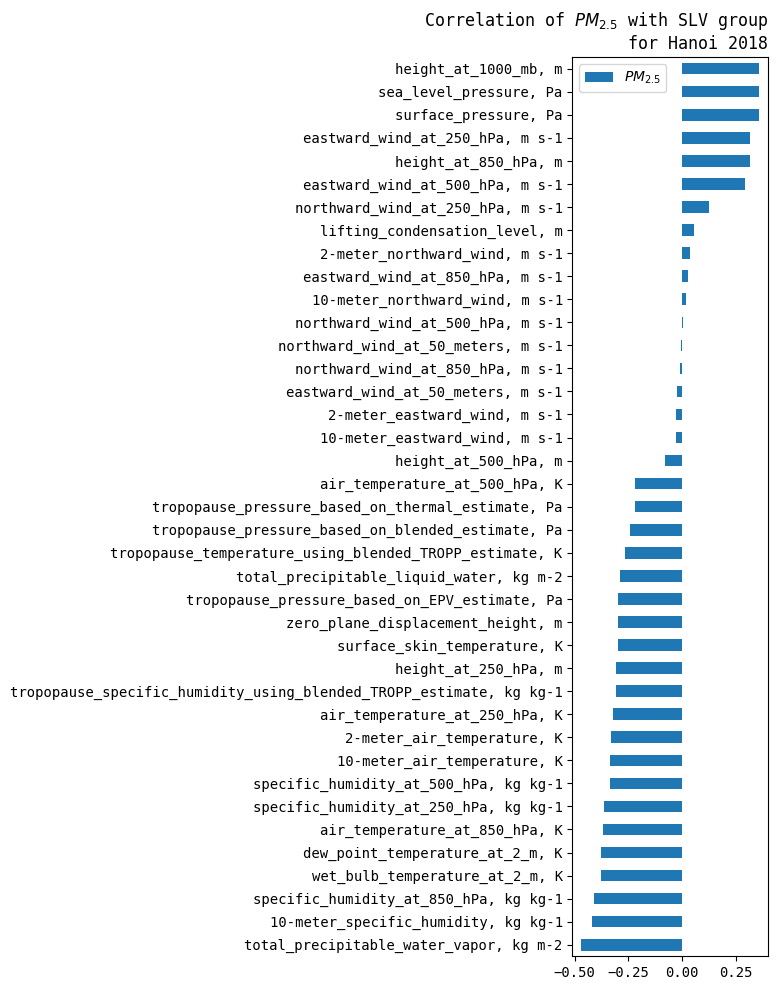

In [22]:
# and recreate the figure above with the standard name
fig, ax = plt.subplots(figsize=(8,10))
df.corr()['pm25'].sort_values().to_frame().dropna().drop('pm25').plot.barh(ax=ax)
ax.legend(['$PM_{2.5}$'], frameon=True)
labels = [item.get_text() for item in ax.get_yticklabels()]

# looking for a standard name for each abbreviation
new_label = dict()
for label in labels:
    if label in list(name_.keys()):
        new_label[label] = name_[label]
    else:
        new_label[label] = label
ax.set_yticklabels(new_label.values())
plt.title('Correlation of $PM_{2.5}$ with SLV group\nfor Hanoi 2018', loc='right')
plt.tight_layout()
plt.savefig('img/2020Aug-SLV-PM25.png', dpi=120, optimize=True)

**What are the strongest parameters correalation with PM<sub>2.5</sub>?**
- vapor and specific humidity 
- near-ground (10m) temperature
- height at 1000mb
- surface pressure
- noted wind (eastward and northward) but not in speed and angle, the correlation in this format is almost none

In [23]:
# better, but there are many parameter, let figure out how to see them in topic
# from above graph, there are 5 main keywords: temperature, humidity, wind, height, pressure
kw='temperature'
cols = list()
for k,v in name_.items():
    if kw in v:
        cols.append(k)
cols

['TROPT', 'T2M', 'T500', 'T2MDEW', 'TS', 'T10M', 'T250', 'T850', 'T2MWET']

In [24]:
# and append 'pm25' to the list
cols.append('pm25')
df[cols].head(3)

TROPT        T2M       T500     T2MDEW         TS  \
2018-01-01 01:00:00  192.50723  286.79376  267.07660  283.94443  284.81787   
2018-01-01 02:00:00  192.63431  286.48932  266.77542  283.87836  284.58258   
2018-01-01 03:00:00  192.71167  286.24753  266.50415  283.75630  284.24567   

                          T10M       T250       T850     T2MWET  pm25  
2018-01-01 01:00:00  287.64883  231.87766  283.64413  283.94345  69.2  
2018-01-01 02:00:00  287.32483  231.85870  283.75928  283.87656  75.5  
2018-01-01 03:00:00  287.03120  231.80463  283.86768  283.76090  90.2

In [25]:
df[cols].corr()

TROPT       T2M      T500    T2MDEW        TS      T10M      T250  \
TROPT   1.000000  0.315999  0.084146  0.330871  0.290673  0.322596  0.225112   
T2M     0.315999  1.000000  0.379661  0.881810  0.979687  0.995631  0.568895   
T500    0.084146  0.379661  1.000000  0.399133  0.329715  0.397767  0.540392   
T2MDEW  0.330871  0.881810  0.399133  1.000000  0.814180  0.898560  0.613574   
TS      0.290673  0.979687  0.329715  0.814180  1.000000  0.958857  0.506865   
T10M    0.322596  0.995631  0.397767  0.898560  0.958857  1.000000  0.588949   
T250    0.225112  0.568895  0.540392  0.613574  0.506865  0.588949  1.000000   
T850    0.274756  0.787170  0.332949  0.927069  0.712200  0.810002  0.583293   
T2MWET  0.330952  0.881913  0.399307  0.999999  0.814307  0.898652  0.613656   
pm25   -0.263994 -0.332513 -0.216435 -0.377794 -0.299172 -0.333160 -0.321817   

            T850    T2MWET      pm25  
TROPT   0.274756  0.330952 -0.263994  
T2M     0.787170  0.881913 -0.332513  
T500    0.332949  0.399307 -0.216435  
T2MDEW  0.927069  0.999999 -0.377794  
TS      0.712200  0.814307 -0.299172  
T10M    0.810002  0.898652 -0.333160  
T250    0.583293  0.613656 -0.321817  
T850    1.000000  0.927037 -0.369821  
T2MWET  0.927037  1.000000 -0.377879  
pm25   -0.369821 -0.377879  1.000000

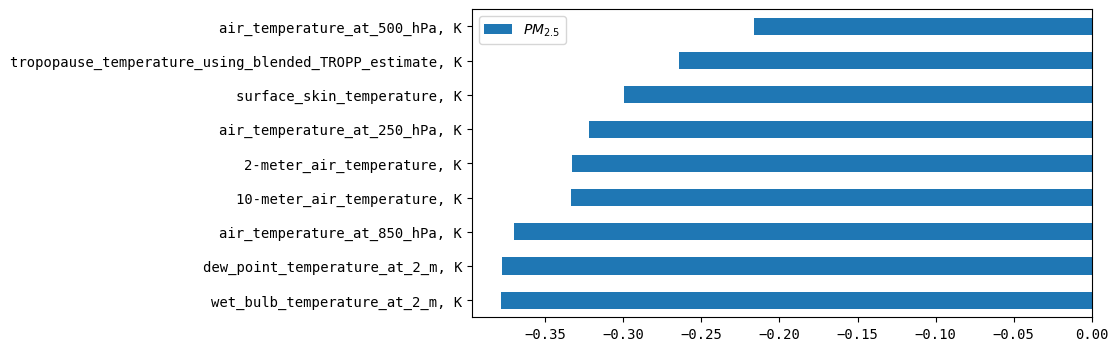

In [26]:
# now we can sub-set only interested columns with temperature topic
# let try again with correlation and sorting
# and recreate the figure above with the standard name
fig, ax = plt.subplots(figsize=(8,4))
df[cols].corr()['pm25'].sort_values().to_frame().dropna().drop('pm25').plot.barh(ax=ax)
ax.legend(['$PM_{2.5}$'], frameon=True)
labels = [item.get_text() for item in ax.get_yticklabels()]

new_label = dict()
for label in labels:
    if label in list(name_.keys()):
        new_label[label] = name_[label]
    else:
        new_label[label] = label
        
ax.set_yticklabels(new_label.values());

- the all paramaters related to **temperature** is inversely correlated with PM<sub>2.5</sub> concentration, with a temperature increases, then PM<sub>2.5.</sub> concentration decreases
- the correlation is wea
- could we apply this approach to similar topic

In [27]:
# filter out topics that not in list of keyword
kws = ['temperature', 'wind', 'pressure']
ignore_cols = dict()
for word in kws:
        for k, v in name_.items():
            if word in v:
                ignore_cols[k] = v
all_cols = name_.keys()
cols = [col for col in all_cols if col not in ignore_cols.keys()]
print(cols)

['TQL', 'H250', 'Q250', 'Q500', 'DISPH', 'H1000', 'Q850', 'ZLCL', 'TQV', 'TROPQ', 'H850', 'H500', 'QV10M']


In [28]:
# let make a function for it

def plot_topic(axis=None, kw=None, kws=None):
    cols = list()
    if kw == None:
        kw = 'others'
        ignore_cols = dict()
        for word in kws:
            for k, v in name_.items():
                if word in v:
                    ignore_cols[k] = v
        all_cols = name_.keys()
        cols = [col for col in all_cols if col not in ignore_cols.keys()]
    else:
        for k,v in name_.items():
            if kw in v:
                cols.append(k)
    cols.append('pm25')
    df[cols].corr()['pm25'].sort_values().to_frame().dropna().drop('pm25').plot.barh(ax=axis)
    axis.get_legend().remove()
    axis.set_title(kw, fontsize=13)
    return axis

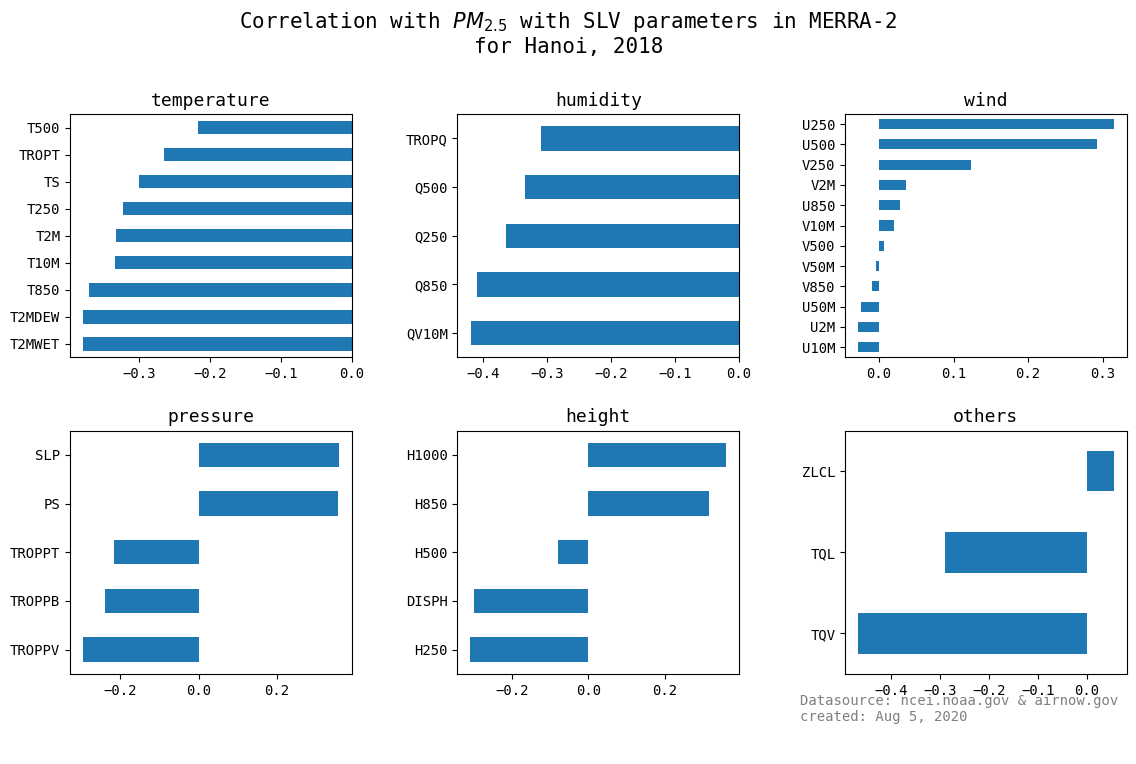

In [29]:
# now, we can split a large selection into each topic
kws = ['temperature', 'humidity', 'wind', 'pressure', 'height']
plt.figure(figsize=(12,8))
plt.subplot(231, fc='gray')
ax1 = plt.subplot(231)
plot_topic(axis=ax1, kw='temperature')

ax2 = plt.subplot(232)
plot_topic(axis=ax2, kw='humidity')

ax3 = plt.subplot(233)
plot_topic(axis=ax3, kw='wind')

ax4 = plt.subplot(234)
plot_topic(axis=ax4, kw='pressure')

ax5 = plt.subplot(235)
plot_topic(axis=ax5, kw='height')

ax6 = plt.subplot(236, )
plot_topic(axis=ax6, kws=kws)
plt.tight_layout(pad=3)
plt.subplots_adjust(top=0.85, bottom=0.15)
plt.suptitle('Correlation with $PM_{2.5}$ with SLV parameters in MERRA-2\nfor Hanoi, 2018', fontsize=15)
plt.figtext(1,0.1, s='Datasource: ncei.noaa.gov & airnow.gov\ncreated: Aug 5, 2020',
            transform=fig.transFigure, ha='left', va='bottom',
           fontsize=10, color='gray')
plt.savefig('img/2020Aug-SLV-subplot.png', dpi=120, optimize=True, edgecolor='black')

**let unpack here**
1. increased temperature correlated with decreased PM<sub>2.5</sub>
2. increased specific humidity correlated with decreased PM<sub>2.5</sub>
3. high-altitude (250-500hPa) eastward wind correlated with positively with PM<sub>2.5</sub>
4. a mix correlation of pressure. A higher pressure on the surface correlated with a higher PM<sub>2.5</sub>
5. similar to pressure, increased height (with a band of pressure) correlated with increased PM<sub>2.5</sub>
6. total vapor is one of the largest correlation coefficient with PM<sub>2.5</sub>

## FLX 
surface turbulent fluxes and related quantities

In [30]:
df = pd.read_csv('data/merra2_flx_hanoi_2018.csv')
df.head(3)

time  FRCAN        CN     BSTAR     QSTAR       PRECANV  \
0  2018-01-01 00:00:00+07    1.0  0.003122 -0.001672  0.000018  4.568880e-23   
1  2018-01-01 01:00:00+07    1.0  0.003123 -0.001603  0.000015  9.132591e-23   
2  2018-01-01 02:00:00+07    1.0  0.003124 -0.001559  0.000013  2.973714e-22   

       ULML  NIRDR      RHOA    TCZPBL  ...    TAUGWY     HFLUX  FRSEAICE  \
0  0.041627    0.0  1.215108  81.69484  ...  0.000311 -1.188591         0   
1  0.436000    0.0  1.216159  76.46914  ...  0.000093 -1.054401         0   
2  0.551879    0.0  1.217125  75.07912  ...  0.000071 -1.021256         0   

   PRECCON     RISFC     EFLUX       PREVTOT      VLML       CDQ       CDH  
0      0.0  3.742796  0.936100  3.244495e-07  1.178854  0.000359  0.000359  
1      0.0  3.876837  0.778694  3.710156e-07  0.891746  0.000339  0.000339  
2      0.0  3.575209  0.677635  2.149609e-07  0.692447  0.000340  0.000340  

[3 rows x 47 columns]

In [31]:
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

In [32]:
# the time here has converted to local with timezone, let drop the timezone info
df.index = df.index.tz_localize(None)
df.head()

FRCAN        CN     BSTAR     QSTAR       PRECANV  \
time                                                                        
2018-01-01 00:00:00  1.000000  0.003122 -0.001672  0.000018  4.568880e-23   
2018-01-01 01:00:00  1.000000  0.003123 -0.001603  0.000015  9.132591e-23   
2018-01-01 02:00:00  1.000000  0.003124 -0.001559  0.000013  2.973714e-22   
2018-01-01 03:00:00  0.993164  0.003125 -0.001562  0.000011  1.638273e-14   
2018-01-01 04:00:00  0.927490  0.003125 -0.001616  0.000008  7.294165e-13   

                         ULML  NIRDR      RHOA    TCZPBL       TLML  ...  \
time                                                                 ...   
2018-01-01 00:00:00  0.041627    0.0  1.215108  81.69484  287.94397  ...   
2018-01-01 01:00:00  0.436000    0.0  1.216159  76.46914  287.56274  ...   
2018-01-01 02:00:00  0.551879    0.0  1.217125  75.07912  287.21948  ...   
2018-01-01 03:00:00  0.384402    0.0  1.218085  76.31604  286.92060  ...   
2018-01-01 04:00:00  0.211296    0.0  1.218972  78.12263  286.70288  ...   

                       TAUGWY     HFLUX  FRSEAICE  PRECCON     RISFC  \
time                                                                   
2018-01-01 00:00:00  0.000311 -1.188591         0      0.0  3.742796   
2018-01-01 01:00:00  0.000093 -1.054401         0      0.0  3.876837   
2018-01-01 02:00:00  0.000071 -1.021256         0      0.0  3.575209   
2018-01-01 03:00:00  0.000186 -0.960083         0      0.0  4.129265   
2018-01-01 04:00:00  0.000219 -0.959011         0      0.0  5.084503   

                        EFLUX       PREVTOT      VLML       CDQ       CDH  
time                                                                       
2018-01-01 00:00:00  0.936100  3.244495e-07  1.178854  0.000359  0.000359  
2018-01-01 01:00:00  0.778694  3.710156e-07  0.891746  0.000339  0.000339  
2018-01-01 02:00:00  0.677635  2.149609e-07  0.692447  0.000340  0.000340  
2018-01-01 03:00:00  0.512928  9.444193e-08  0.631644  0.000322  0.000322  
2018-01-01 04:00:00  0.374393  6.108894e-08  0.642764  0.000318  0.000318  

[5 rows x 46 columns]

In [33]:
# merge data
df = pd.merge(df, pm25, right_index=True, left_index=True)
df.index.rename('DATE', inplace=True)
df.columns

Index(['FRCAN', 'CN', 'BSTAR', 'QSTAR', 'PRECANV', 'ULML', 'NIRDR', 'RHOA',
       'TCZPBL', 'TLML', 'PRECTOT', 'FRCCN', 'USTAR', 'SPEED', 'EVAP', 'QLML',
       'DISPH', 'TAUX', 'PRECTOTCORR', 'HLML', 'PRECLSC', 'TAUGWX', 'QSH',
       'PGENTOT', 'GHTSKIN', 'PRECSNO', 'TSH', 'FRCLS', 'Z0M', 'Z0H', 'TAUY',
       'TSTAR', 'NIRDF', 'CDM', 'PBLH', 'SPEEDMAX', 'TAUGWY', 'HFLUX',
       'FRSEAICE', 'PRECCON', 'RISFC', 'EFLUX', 'PREVTOT', 'VLML', 'CDQ',
       'CDH', 'pm25'],
      dtype='object')

In [34]:
ds = nc.Dataset('data/nc4/MERRA2_400.tavg1_2d_flx_Nx.20180102.nc4')

In [35]:
name_ = dict()
for k in ds.variables.keys():
    name_[k] = f'{ds.variables[k].standard_name}, {ds.variables[k].units}'
name_   

{'FRCAN': 'areal_fraction_of_anvil_showers, 1',
 'CN': 'surface_neutral_drag_coefficient, 1',
 'BSTAR': 'surface_bouyancy_scale, m s-2',
 'QSTAR': 'surface_moisture_scale, kg kg-1',
 'PRECANV': 'anvil_precipitation, kg m-2 s-1',
 'ULML': 'surface_eastward_wind, m s-1',
 'NIRDR': 'surface_downwelling_nearinfrared_beam_flux, W m-2',
 'RHOA': 'air_density_at_surface, kg m-3',
 'TCZPBL': 'transcom_planetary_boundary_layer_height, m',
 'TLML': 'surface_air_temperature, K',
 'PRECTOT': 'total_precipitation, kg m-2 s-1',
 'FRCCN': 'areal_fraction_of_convective_showers, 1',
 'USTAR': 'surface_velocity_scale, m s-1',
 'SPEED': 'surface_wind_speed, m s-1',
 'EVAP': 'evaporation_from_turbulence, kg m-2 s-1',
 'QLML': 'surface_specific_humidity, 1',
 'DISPH': 'zero_plane_displacement_height, m',
 'TAUX': 'eastward_surface_stress, N m-2',
 'PRECTOTCORR': 'total_precipitation, kg m-2 s-1',
 'HLML': 'surface_layer_height, m',
 'PRECLSC': 'nonanvil_large_scale_precipitation, kg m-2 s-1',
 'TAUGWX': 's

In [36]:
new_label = dict()
labels = list(df.columns)
for label in labels:
#     print(label)
    if label in list(name_.keys()):
        new_label[label] = name_[label]
#         print(label)
    else:
#         print('.')
        new_label[label] = label
new_label

{'FRCAN': 'areal_fraction_of_anvil_showers, 1',
 'CN': 'surface_neutral_drag_coefficient, 1',
 'BSTAR': 'surface_bouyancy_scale, m s-2',
 'QSTAR': 'surface_moisture_scale, kg kg-1',
 'PRECANV': 'anvil_precipitation, kg m-2 s-1',
 'ULML': 'surface_eastward_wind, m s-1',
 'NIRDR': 'surface_downwelling_nearinfrared_beam_flux, W m-2',
 'RHOA': 'air_density_at_surface, kg m-3',
 'TCZPBL': 'transcom_planetary_boundary_layer_height, m',
 'TLML': 'surface_air_temperature, K',
 'PRECTOT': 'total_precipitation, kg m-2 s-1',
 'FRCCN': 'areal_fraction_of_convective_showers, 1',
 'USTAR': 'surface_velocity_scale, m s-1',
 'SPEED': 'surface_wind_speed, m s-1',
 'EVAP': 'evaporation_from_turbulence, kg m-2 s-1',
 'QLML': 'surface_specific_humidity, 1',
 'DISPH': 'zero_plane_displacement_height, m',
 'TAUX': 'eastward_surface_stress, N m-2',
 'PRECTOTCORR': 'total_precipitation, kg m-2 s-1',
 'HLML': 'surface_layer_height, m',
 'PRECLSC': 'nonanvil_large_scale_precipitation, kg m-2 s-1',
 'TAUGWX': 's

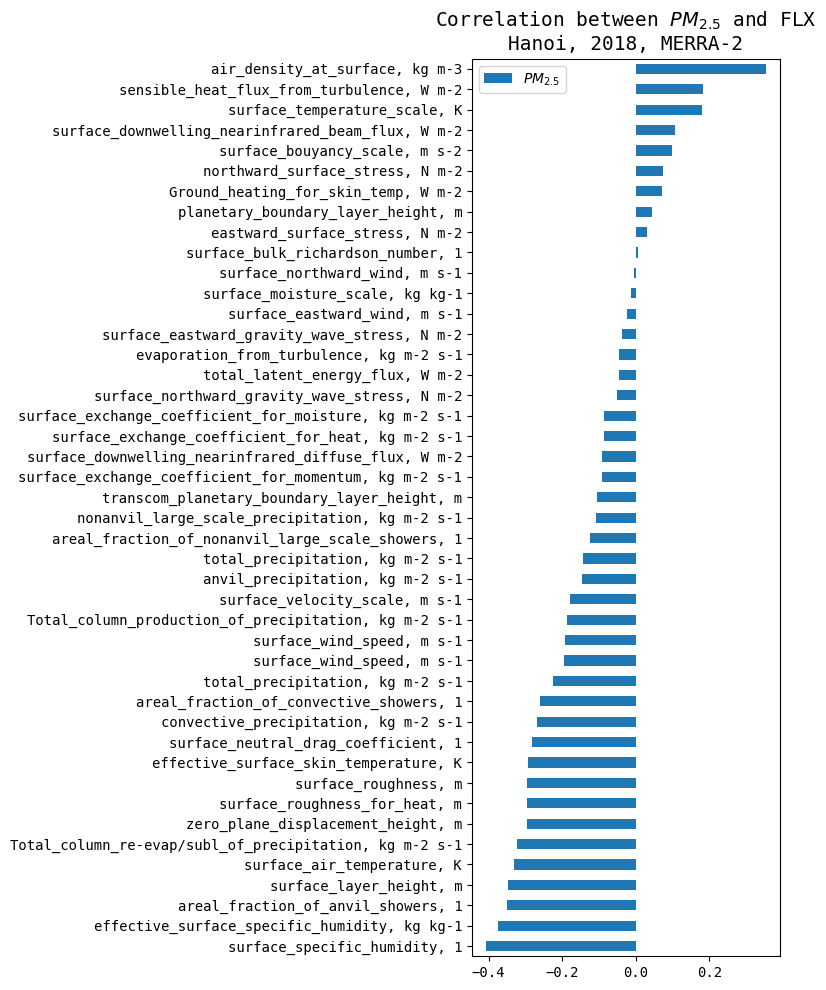

In [37]:
# let make one graph for whole group
fig, ax = plt.subplots(figsize=(8,10))
df.corr()['pm25'].sort_values().to_frame().dropna().drop('pm25').plot.barh(ax=ax)
ax.legend(['$PM_{2.5}$'], frameon=True)
ax.set_title('Correlation between $PM_{2.5}$ and FLX\nHanoi, 2018, MERRA-2', fontsize=14)

labels = [item.get_text() for item in ax.get_yticklabels()]

# looking for a standard name for each abbreviation
new_label = dict()
for label in labels:
    if label in list(name_.keys()):
        new_label[label] = name_[label]
    else:
        new_label[label] = label

ax.set_yticklabels(new_label.values())
fig.tight_layout()
fig.savefig('img/2020Aug-FLX.png', dpi=120, optimize=True)

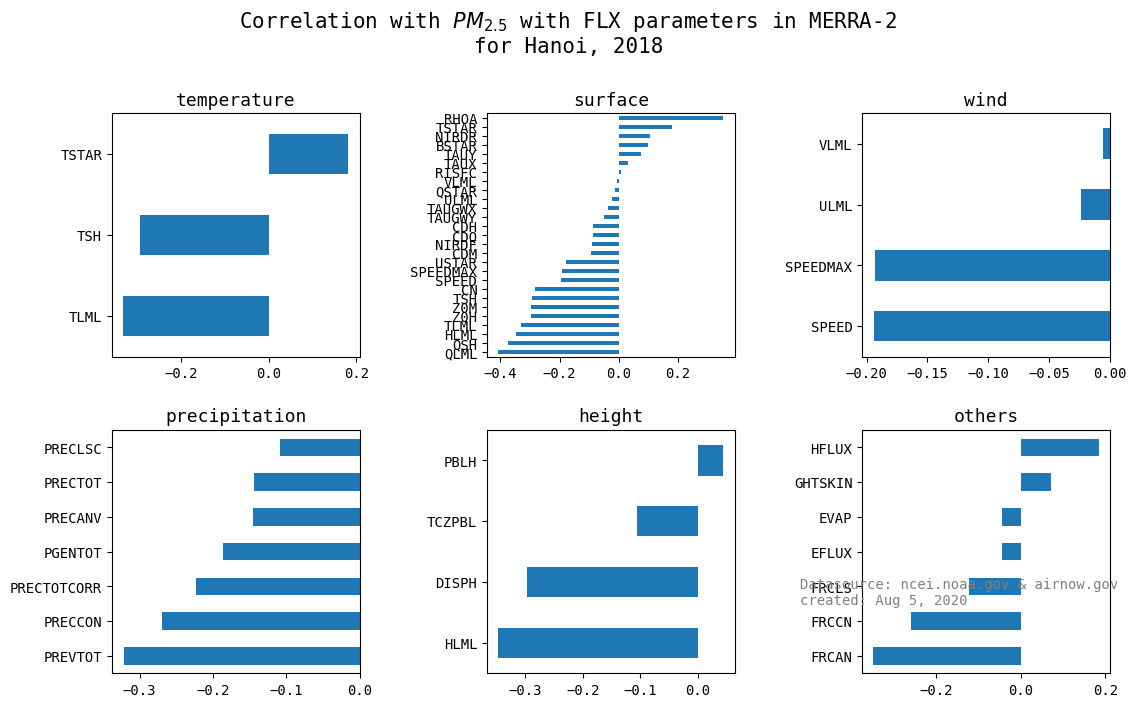

In [38]:
# now, we can split a large selection into each topic
kws = ['temperature', 'surface', 'wind', 'precipitation', 'height']
plt.figure(figsize=(12,8))
plt.subplot(231, fc='gray')
ax1 = plt.subplot(231)
plot_topic(axis=ax1, kw='temperature')

ax2 = plt.subplot(232)
plot_topic(axis=ax2, kw='surface')

ax3 = plt.subplot(233)
plot_topic(axis=ax3, kw='wind')

ax4 = plt.subplot(234)
plot_topic(axis=ax4, kw='precipitation')

ax5 = plt.subplot(235)
plot_topic(axis=ax5, kw='height')

ax6 = plt.subplot(236, )
plot_topic(axis=ax6, kws=kws)
plt.tight_layout(pad=3)
plt.subplots_adjust(top=0.85, bottom=0.15)
plt.suptitle('Correlation with $PM_{2.5}$ with FLX parameters in MERRA-2\nfor Hanoi, 2018', fontsize=15)
plt.figtext(1,0.1, s='Datasource: ncei.noaa.gov & airnow.gov\ncreated: Aug 5, 2020',
            transform=fig.transFigure, ha='left', va='bottom',
           fontsize=10, color='gray')
plt.savefig('img/2020Aug-FLX-subplot.png', dpi=120, optimize=True, edgecolor='black')

**summary**
- not easy to filter the flux group into several topic like with single level
- denser air is positively correlated with PM<sub>2.5</sub> (similar to pressure does)
- high humidity or shower is correlated inversely with PM<sub>2.5</sub>
- height for roughness, surface layer or zero-plane-displacement is correlated inversely with PM<sub>2.5</sub>

## AER
aerosol mixing ratio

In [39]:
df = pd.read_csv('data/merra2_aer_hanoi_2018.csv',
                parse_dates=['date_utc'],
                index_col=['date_utc'])
df.head(3)

SSSMASS25  DUSCATAU  BCSCATAU  DUEXTTAU       BCFLUXU  \
date_utc                                                                        
2018-01-01 00:00:00  7.230483e-10  0.034630  0.011679  0.036952  8.302304e-07   
2018-01-01 01:00:00  7.119070e-10  0.034171  0.011854  0.036463  1.970886e-06   
2018-01-01 02:00:00  6.959923e-10  0.033618  0.011953  0.035879  2.143218e-06   

                      OCFLUXV  BCANGSTR   SUFLUXV       SSSMASS       OCSMASS  \
date_utc                                                                        
2018-01-01 00:00:00  0.000025  1.456636  0.000091  4.378307e-09  1.502486e-08   
2018-01-01 01:00:00  0.000025  1.457095  0.000085  4.245521e-09  1.636363e-08   
2018-01-01 02:00:00  0.000025  1.456786  0.000079  4.072719e-09  1.762964e-08   

                     ...   BCFLUXV     DUSMASS25   SSCMASS  SUSCATAU  \
date_utc             ...                                               
2018-01-01 00:00:00  ...  0.000009  1.470835e-08  0.000005  0.571058   
2018-01-01 01:00:00  ...  0.000009  1.466833e-08  0.000005  0.551104   
2018-01-01 02:00:00  ...  0.000009  1.462467e-08  0.000005  0.528770   

                         SO2SMASS  SSANGSTR  DUEXTT25   OCFLUXU  OCSCATAU  \
date_utc                                                                    
2018-01-01 00:00:00  3.013702e-08  0.019904  0.023890  0.000013  0.067696   
2018-01-01 01:00:00  3.055902e-08  0.020477  0.023577  0.000015  0.069378   
2018-01-01 02:00:00  3.080640e-08  0.021586  0.023200  0.000016  0.070274   

                     TOTSCATAU  
date_utc                        
2018-01-01 00:00:00   0.692555  
2018-01-01 01:00:00   0.674240  
2018-01-01 02:00:00   0.652710  

[3 rows x 50 columns]

In [40]:
# merge data
df = pd.merge(df, pm25, right_index=True, left_index=True)
df.index.rename('DATE', inplace=True)
df.head(3)

SSSMASS25  DUSCATAU  BCSCATAU  DUEXTTAU   BCFLUXU  \
DATE                                                                        
2018-01-01 01:00:00  7.119070e-10  0.034171  0.011854  0.036463  0.000002   
2018-01-01 02:00:00  6.959923e-10  0.033618  0.011953  0.035879  0.000002   
2018-01-01 03:00:00  6.832592e-10  0.032991  0.012047  0.035206  0.000001   

                      OCFLUXV  BCANGSTR   SUFLUXV       SSSMASS       OCSMASS  \
DATE                                                                            
2018-01-01 01:00:00  0.000025  1.457095  0.000085  4.245521e-09  1.636363e-08   
2018-01-01 02:00:00  0.000025  1.456786  0.000079  4.072719e-09  1.762964e-08   
2018-01-01 03:00:00  0.000026  1.456983  0.000078  3.930848e-09  1.876470e-08   

                     ...     DUSMASS25   SSCMASS  SUSCATAU      SO2SMASS  \
DATE                 ...                                                   
2018-01-01 01:00:00  ...  1.466833e-08  0.000005  0.551104  3.055902e-08   
2018-01-01 02:00:00  ...  1.462467e-08  0.000005  0.528770  3.080640e-08   
2018-01-01 03:00:00  ...  1.457738e-08  0.000005  0.500999  3.099558e-08   

                     SSANGSTR  DUEXTT25   OCFLUXU  OCSCATAU  TOTSCATAU  pm25  
DATE                                                                          
2018-01-01 01:00:00  0.020477  0.023577  0.000015  0.069378   0.674240  69.2  
2018-01-01 02:00:00  0.021586  0.023200  0.000016  0.070274   0.652710  75.5  
2018-01-01 03:00:00  0.021008  0.022779  0.000013  0.071050   0.625407  90.2  

[3 rows x 51 columns]

In [41]:
ds = nc.Dataset('data/nc4/MERRA2_400.tavg1_2d_aer_Nx.20180101.nc4')

In [42]:
name_ = dict()
for k in ds.variables.keys():
#     print(k)
#     name_[k] = 'None'
    name_[k] = f'{ds.variables[k].standard_name}, {ds.variables[k].units}'.lower()
name_

{'SSSMASS25': 'sea salt surface mass concentration - pm 2.5, kg m-3',
 'DUSCATAU': 'dust scattering aot [550 nm], 1',
 'BCSCATAU': 'black carbon scattering aot [550 nm], 1',
 'DUEXTTAU': 'dust extinction aot [550 nm], 1',
 'BCFLUXU': 'black carbon column u-wind mass flux, kg m-1 s-1',
 'OCFLUXV': 'organic carbon column v-wind mass flux __ensemble__, kg m-1 s-1',
 'BCANGSTR': 'black carbon angstrom parameter [470-870 nm], 1',
 'SUFLUXV': 'so4 column v-wind mass flux __ensemble__, kg m-1 s-1',
 'SSSMASS': 'sea salt surface mass concentration, kg m-3',
 'OCSMASS': 'organic carbon surface mass concentration __ensemble__, kg m-3',
 'BCCMASS': 'black carbon column mass density, kg m-2',
 'BCSMASS': 'black carbon surface mass concentration, kg m-3',
 'SO4CMASS': 'so4 column mass density __ensemble__, kg m-2',
 'SSFLUXU': 'sea salt column u-wind mass flux, kg m-1 s-1',
 'DUCMASS': 'dust column mass density, kg m-2',
 'SSEXTTAU': 'sea salt extinction aot [550 nm], 1',
 'SO2CMASS': 'so2 column m

In [43]:
df.corr()['pm25'].sort_values().to_frame().dropna().drop('pm25')

pm25
DMSCMASS  -0.232325
DMSSMASS  -0.182772
BCANGSTR  -0.139689
SSSMASS25 -0.122650
SSSMASS   -0.112831
SSFLUXV   -0.047410
SSEXTTAU  -0.039720
SSSCATAU  -0.039720
DUFLUXV   -0.030967
SSSCAT25  -0.030423
SSEXTT25  -0.030423
OCFLUXV   -0.021505
DUCMASS   -0.007796
SSCMASS   -0.002014
SSCMASS25  0.001905
OCFLUXU    0.005658
DUEXTTAU   0.005894
DUSCATAU   0.006446
DUFLUXU    0.007068
DUSMASS    0.011084
DUCMASS25  0.012861
DUEXTT25   0.015269
DUSCAT25   0.015350
OCCMASS    0.016910
OCEXTTAU   0.027543
OCSCATAU   0.027741
DUSMASS25  0.033828
BCFLUXV    0.034157
OCSMASS    0.034721
SSANGSTR   0.042832
SSFLUXU    0.051709
BCFLUXU    0.067402
TOTSCATAU  0.093900
TOTEXTTAU  0.094060
BCCMASS    0.098560
BCSCATAU   0.101324
BCEXTTAU   0.102098
SUEXTTAU   0.134530
SUSCATAU   0.134530
SUFLUXU    0.174666
SUFLUXV    0.174772
SUANGSTR   0.180727
OCANGSTR   0.180835
SO2CMASS   0.187421
DUANGSTR   0.192490
SO4SMASS   0.205338
SO4CMASS   0.215542
BCSMASS    0.226259
TOTANGSTR  0.235356
SO2SMASS   0.256301

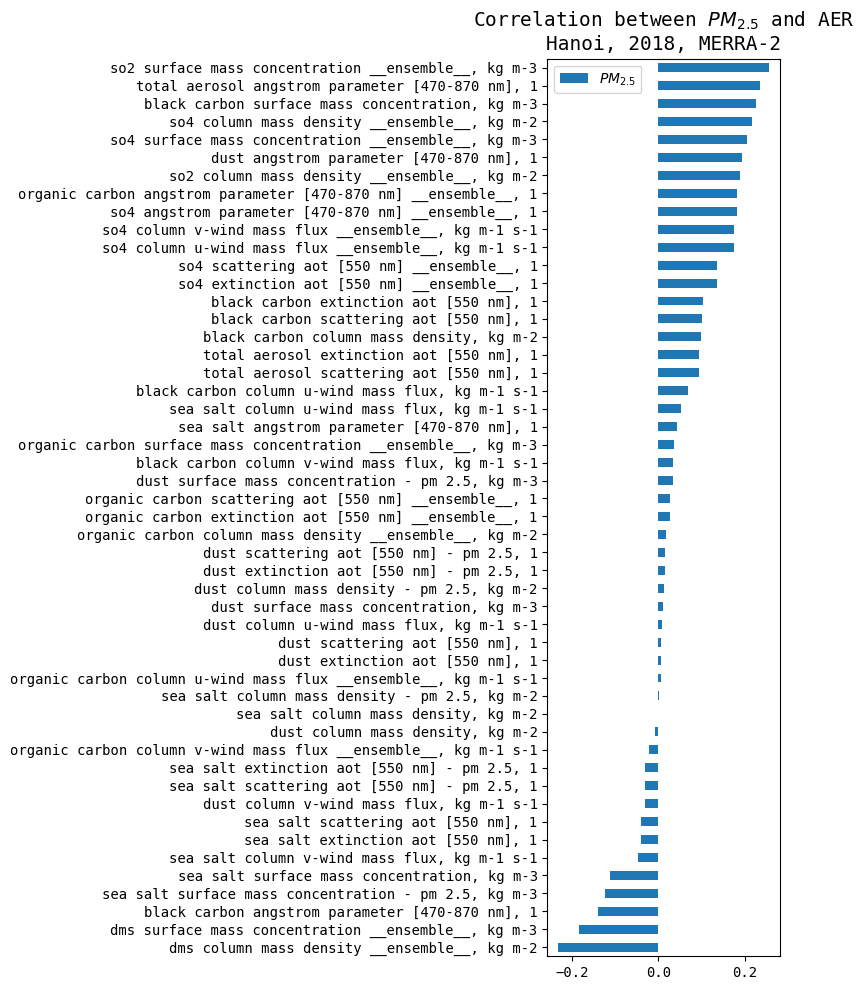

In [44]:
# let make one graph for whole group
fig, ax = plt.subplots(figsize=(8,10))
df.corr()['pm25'].sort_values().to_frame().dropna().drop('pm25').plot.barh(ax=ax)
ax.legend(['$PM_{2.5}$'], frameon=True)
ax.set_title('Correlation between $PM_{2.5}$ and AER\nHanoi, 2018, MERRA-2', fontsize=14)

labels = [item.get_text() for item in ax.get_yticklabels()]

new_label = dict()
for label in labels:
    if label in list(name_.keys()):
        new_label[label] = name_[label]
    else:
        new_label[label] = label

ax.set_yticklabels(new_label.values())
fig.tight_layout()
fig.savefig('img/2020Aug-AER.png', dpi=120, optimize=True)

In [45]:
fig, ax = plt.subplots()
plot_topic(axis=ax, kw='550')

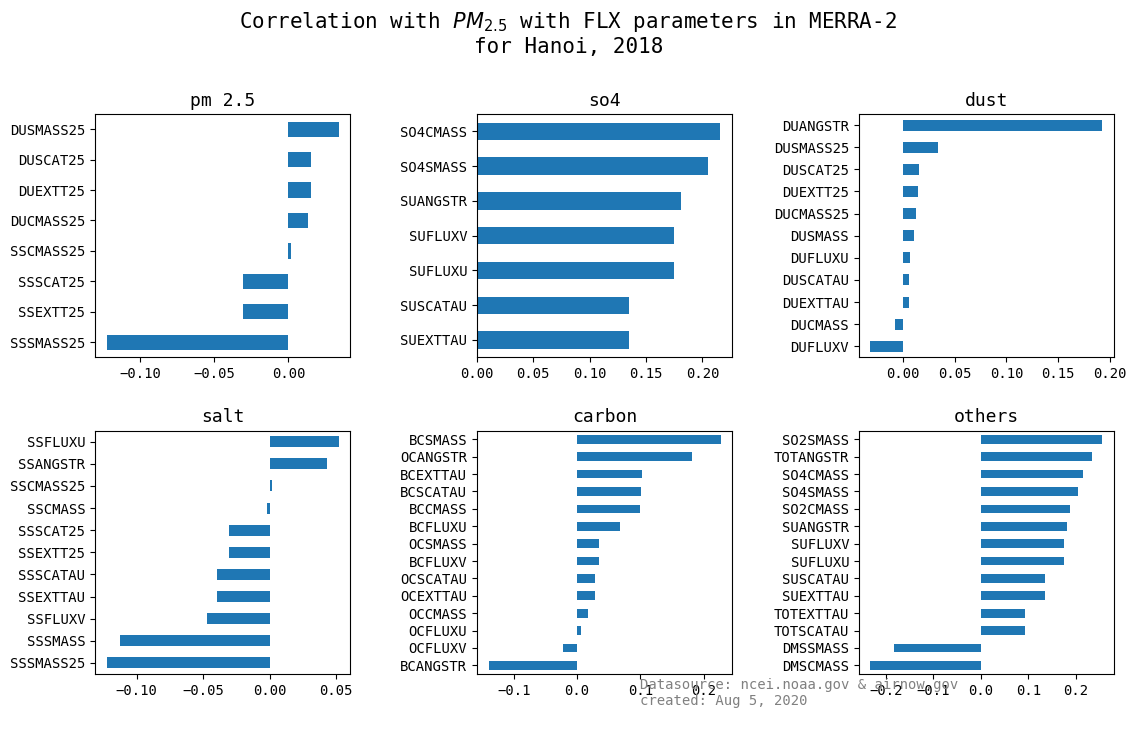

In [46]:
# now, we can split a large selection into each topic
kws = ['pm 2.5' 'so4', 'dust', 'salt', 'carbon']
plt.figure(figsize=(12,8))
plt.subplot(231, fc='gray')

ax1 = plt.subplot(231)
plot_topic(axis=ax1, kw='pm 2.5')

ax2 = plt.subplot(232)
plot_topic(axis=ax2, kw='so4')

ax3 = plt.subplot(233)
plot_topic(axis=ax3, kw='dust')

ax4 = plt.subplot(234)
plot_topic(axis=ax4, kw='salt')

ax5 = plt.subplot(235)
plot_topic(axis=ax5, kw='carbon')

ax6 = plt.subplot(236, )
plot_topic(axis=ax6, kws=kws)
plt.tight_layout(pad=3)
plt.subplots_adjust(top=0.85, bottom=0.15)
plt.suptitle('Correlation with $PM_{2.5}$ with FLX parameters in MERRA-2\nfor Hanoi, 2018', fontsize=15)
plt.figtext(1,0.1, s='Datasource: ncei.noaa.gov & airnow.gov\ncreated: Aug 5, 2020',
            transform=fig.transFigure, ha='left', va='bottom',
           fontsize=10, color='gray')
plt.savefig('img/2020Aug-AER-subplot.png', dpi=120, optimize=True, edgecolor='black')

**summary**
- no strong correlation with aerosol parameters to PM<sub>2.5</sub>
- sulfate and black carbon are possitively correlated with PM<sub>2.5</sub>

## Concluding notes
- MERRA-2 is an extensive collection of data of Earth atmosphere. It provides global data on the ground and in upper air 
- no strong to moderate correlation of atmospheric paramter to PM<sub>2.5</sub>. The highest coeeficient is -0.4, and a few other in a range of 0.3-0.4
- increment of temperature and humidity is inversely correlated with PM<sub>2.5</sub>
- high surface pressure or high sulfate is positively correlated with PM<sub>2.5</sub>
- current format of wind data (eastward and northward) is not sufficient to correlate with PM<sub>2.5</sub> concentration